In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [17]:
def drawimg(img, title='picture'):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(title+str(img.shape))
    plt.style.use('seaborn')
    plt.show()

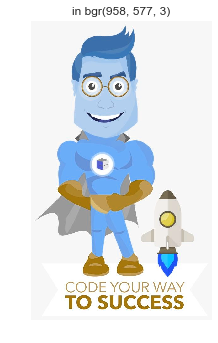

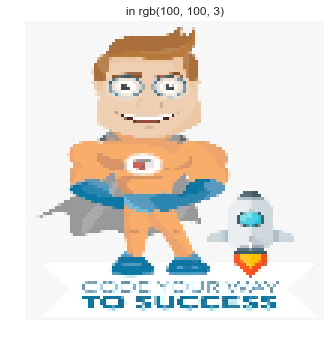

In [18]:
img_= cv2.imread('./images/cbsupe.jpeg')#in BGR format 
drawimg(img_, 'in bgr')
img_=cv2.resize(img_, (100, 100))
img_= cv2.cvtColor(img_,cv2.COLOR_BGR2RGB) #converting BGR to RGB
drawimg(img_, 'in rgb')


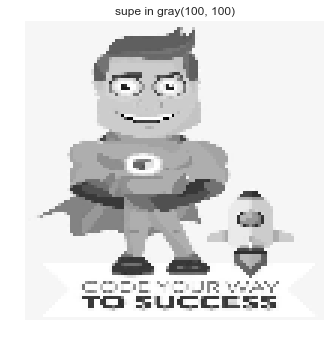

In [19]:
# to understand the concept of filters we are going to convert our image to gray scale
img_gray= cv2.cvtColor(img_, cv2.COLOR_RGB2GRAY)
drawimg(img_gray, 'supe in gray')

## Using filters to extract features

In [31]:
#harcording filter for one example

def convolution(img, img_filter):
    H= img.shape[0]
    W= img.shape[1]
    
    F= img_filter.shape[0]
    new_image= np.zeros((H-F+1, W-F+1));
    
    for row in range (H-F+1):
        for col in range(W-F+1):
            for i in range(F):
                for j in range(F):
                    new_image[row][col]+= img[row+i][col+j] * img_filter[i][j]
            
            if(new_image[row][col]>255):
                new_image[row][col]= 255
            if(new_image[row][col]<0):
                new_image[row][col]= 0 
    return new_image #activation filter


[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


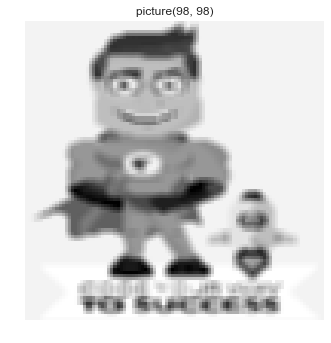

In [32]:
blur_filter= np.ones((3, 3)) #produces a blur image of any given image
blur_filter/= 9.0
print(blur_filter)
drawimg(convolution(img_gray, blur_filter))

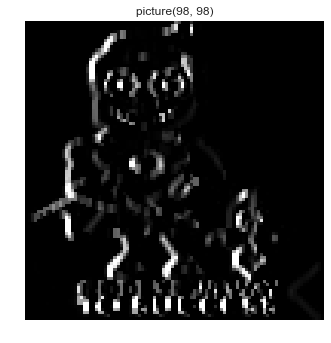

In [33]:
edge_filter= np.array([[1,0,-1],
                       [1,0,-1],
                       [1,0,-1]
                      ])#edges are highlighted
drawimg(convolution(img_gray, edge_filter))

## Convolution layer
- each layer has multiple filters
- each filter gives an activation map/feature map
- all the activation map/feature map are stacked to form the output volume
-so CNN takes input volume and produces output volume of different shape

## Buzzwords in CNN
- padding 
- strides 
- convolution layer
- kernals/filters
- pooling 
- valid/same convolution

# Padding
In the above case the image size got reduces from 100* 100 to 98* 98 . To achieve same convolution  
padding is done, that is the image is initially made 102* 102 by adding 0s to the image on all sides 

(100, 100, 3)


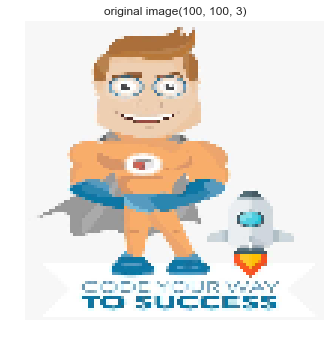

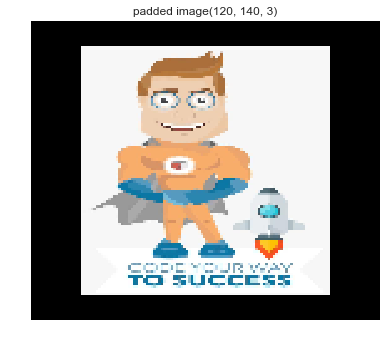

(120, 140, 3)


In [36]:
# padding example
print(img_.shape)
drawimg(img_, "original image")

img_pad = np.pad(img_,((10, 10), (20, 20), (0, 0)), 'constant',constant_values=0)
drawimg(img_pad, "padded image")
print(img_pad.shape)

# Stride 
- filters can have different size as well as differnt movements 
- a stride defines how a filter moves in an image
- in the filters above we used the stride of (1,1)
- we can also have a stride of(2,2), that is skip 2 pixels when we move horizontally and vertically
- number of pixels we skip each time is called stride

# Pooling
- pooling is done after convolution operation 
- 2 types of pooling -average pooling and max pooling
- max pooling layer- slides the max pooling window(f,f)over the input layer choose the maximum value of
the window in the max pooling layer
- average pooling layer- slides the average pooling window(f,f) over the input layer and choose the
average value of the window in the average pooling layer
- It helps to reduce computation by discarding 75% of the neurons assuming 2* 2 filter with the stride
of 2
- it helps to make the detector more robust
- it requires no input features just hyperparametres like type of pooling and filter size

In [57]:
# implementing pooling in an array

X= np.array([[1,0,3,5],
    [8,5,9,1],
    [10, 1, 2, 3],
    [2,3,17, 4]])

def pooling(X, mode="max", stride=2, fsize= 2):
    H,W= X.shape
    hpool=int((H-fsize)/stride)+1
    wpool=int((W-fsize)/stride)+1
    
    pool = np.zeros((hpool, wpool))
    
    for r in range(hpool):
        for c in range(wpool):
            Xstart= r*stride
            Xend= r*stride +fsize
            
            Ystart= c*stride 
            Yend= c*stride + fsize
            
            Xtemp= X[Xstart:Xend, Ystart:Yend]
            if(mode=="max"):
                pool[r][c]= np.max(Xtemp)
            else:
                pool[r][c]= np.average(Xtemp)
    return pool
print(pooling(X))

    

[[ 8.  9.]
 [10. 17.]] avg
